In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#!pip3 install pysindy
#import pysindy as ps
import scipy.stats as stats
import os
import pandas as pd
import numpy as np
pd.set_option("display.precision", 3)
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
folder_path = str('/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results')

shifted_train = dict()
shifted_eval = dict()
noshift_train = dict()
noshift_eval = dict()
performance_summaries = dict()
for subdir, dirs, files in os.walk(folder_path):
    print(subdir)
    for file in files:
        if("error_metrics" in str(os.path.join(subdir, file))):
          #print(str(subdir)[88:88+8])
          site_id = str(subdir)[88:88+8]
          # only look at the linear models
          if ("po_1" in str(os.path.join(subdir, file))):
            if ("training" in str(os.path.join(subdir, file))):
              if ("no_shift" in str(os.path.join(subdir, file))):
                noshift_train[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
              else:
                shifted_train[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
            elif ("eval" in  str(os.path.join(subdir, file))):
              if ("no_shift" in str(os.path.join(subdir, file))):
                noshift_eval[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
              else:
                shifted_eval[site_id] = pd.read_csv(str(os.path.join(subdir, file)))

          #print(str(file))
          #print(str(os.path.join(subdir, file)))
          #site_id = str(file).partition('_')[2][:-33]
          #print(site_id)
          #performance_summaries[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
          #trained_site_ids.append(str(subdir)[-8:])
        #print(os.path.join(subdir, file))
#print(shifted_train['03439000'].NSE.mean())
for site_id in shifted_eval:
  print(shifted_eval[site_id])

/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_1_no_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_2_no_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03455500_po_1_no_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_3_no_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_1_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_2_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03439000_po_3_shift
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/camels_modpods_results/03455500_po_2_no_shift
/content/drive/MyDrive/PhD Admin 

In [3]:
# grab all the NSE's from each type and make a list
shift_train_NSE = list()
for site_id in shifted_train:
  shift_train_NSE.append(shifted_train[site_id].NSE.mean())
shift_eval_NSE = list()
for site_id in shifted_eval:
  shift_eval_NSE.append(shifted_eval[site_id].NSE.mean())
noshift_train_NSE = list()

for site_id in noshift_train:
  noshift_train_NSE.append(noshift_train[site_id].NSE.mean())
noshift_eval_NSE = list()
for site_id in noshift_eval:
  noshift_eval_NSE.append(noshift_eval[site_id].NSE.mean())
print(shift_train_NSE)
print(shift_eval_NSE)
print(noshift_train_NSE)
print(noshift_eval_NSE)


shift_bins = np.linspace(0,1,len(shift_train_NSE))
noshift_bins = np.linspace(0,1,len(noshift_train_NSE))

[-1.163809453563275, 0.1152524391391741, -0.4324325654266302, -0.9247963502242308, -0.5936084551167988, 0.0673649819276109]
[0.3132498902154813, -0.0787272249664197, 0.185074522467035, -0.7039205755255677, -1.3727446443201212, 0.3768290867114461]
[-8.351677962636026e+54, -1.3812496463518107, -1.0068969097213045, 0.28813457328773073, -223.0088334517842, -0.02246305663778965, -1.4447383343761064, -2.29309289762188]
[-1.6964569689272955e+53, -0.2251537002941752, 0.2162438679349378, 0.4014122534487154, -34.77405791792724, 0.085386871734191, -2.961039300173843, -2.3901452449669143]


Train Failure Rate (NSE < 0)
Shift:  0.6666666666666666
No Shift: 0.875
Eval Failure Rate (NSE < 0)
Shift:  0.5
No Shift: 0.625


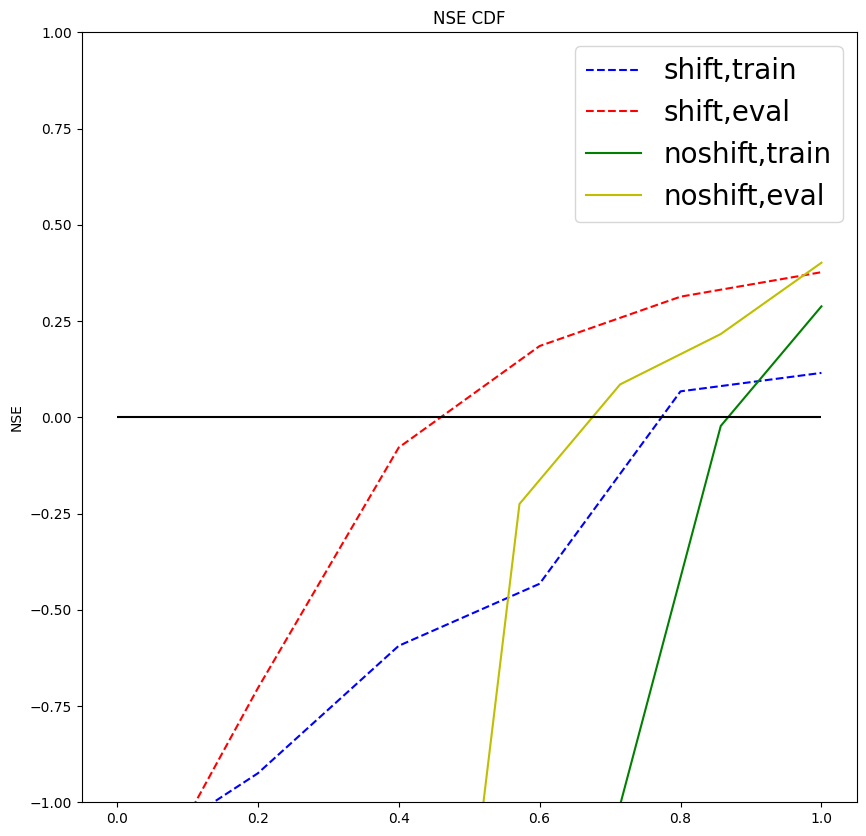

In [4]:
plt.figure(figsize=(10,10))
plt.plot(shift_bins,np.sort(shift_train_NSE),'b--',label='shift,train')
plt.plot(shift_bins,np.sort(shift_eval_NSE),'r--',label='shift,eval')
plt.plot(noshift_bins,np.sort(noshift_train_NSE),'g-',label='noshift,train')
plt.plot(noshift_bins,np.sort(noshift_eval_NSE),'y-',label='noshift,eval')
plt.ylabel("NSE")
plt.ylim([-1,1])
plt.hlines(0,0,1,'k')
plt.legend(fontsize=20)
plt.title("NSE CDF")


print("Train Failure Rate (NSE < 0)")
print("Shift: ", len([x for x in shift_train_NSE if x < 0]) / len(shift_train_NSE))
print("No Shift:", len([x for x in noshift_train_NSE if x < 0]) / len(noshift_train_NSE))

print("Eval Failure Rate (NSE < 0)")
print("Shift: ", len([x for x in shift_eval_NSE if x < 0]) / len(shift_eval_NSE))
print("No Shift:", len([x for x in noshift_eval_NSE if x < 0]) / len(noshift_eval_NSE))


